# Практические задания: Регуляризация и отбор признаков

## Введение

Данный практикум предназначен для закрепления знаний по методам регуляризации в машинном обучении. Вы будете работать с реальными данными и изучите применение различных техник регуляризации и отбора признаков.

### Цели практикума:
- Освоить применение Ridge, Lasso и Elastic Net регрессии
- Изучить методы отбора признаков
- Научиться настраивать гиперпараметры
- Сравнить эффективность различных подходов

### Структура заданий:
1. **Подготовка данных и анализ переобучения**
2. **Применение методов регуляризации**
3. **Отбор признаков**
4. **Настройка гиперпараметров**
5. **Сравнительный анализ**

---

## Задание 1: Подготовка данных и исследование переобучения

### Задача 1.1: Импорт библиотек и создание данных

**Инструкция:** Импортируйте необходимые библиотеки и создайте синтетический датасет для демонстрации переобучения.

In [18]:
# TODO: Импортируйте необходимые библиотеки
# Подсказка: numpy, pandas, matplotlib, sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Библиотеки успешно импортированы")

Библиотеки успешно импортированы


In [19]:
# TODO: Создайте синтетический датасет для демонстрации переобучения
# Параметры:
# - 150 образцов
# - 100 признаков
# - 15 информативных признаков
# - уровень шума 0.2

#ПРИМЕР:
np.random.seed(42)

X, y = make_regression(
    n_samples=150,
    n_features=100,
    n_informative=15,
    noise=0.2,
    random_state=42
)

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Соотношение признаков к образцам: {X_train.shape[1]/X_train.shape[0]:.2f}")

Размер обучающей выборки: (105, 100)
Размер тестовой выборки: (45, 100)
Соотношение признаков к образцам: 0.95


### Задача 1.2: Анализ переобучения базовой модели

**Инструкция:** Обучите базовую линейную регрессию и проанализируйте наличие переобучения.

In [20]:
# TODO: Обучите базовую линейную регрессию и оцените переобучение

# Пример:
# baseline_model = LinearRegression()
# baseline_model.fit(X_train, y_train)
test_score = 1
train_score = 1

# # Оценка качества
# train_score = baseline_model.score(X_train, y_train)
# test_score = baseline_model.score(X_test, y_test)
# overfitting = train_score - test_score

print("Результаты базовой линейной регрессии:")
print(f"Train R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")
print(f"Переобучение (разность): {overfitting:.4f}")

# TODO: Интерпретируйте результаты
# if overfitting > 0.1:
#     print("\nВывод: Обнаружено значительное переобучение")
# elif overfitting > 0.05:
#     print("\nВывод: Умеренное переобучение")
# else:
#     print("\nВывод: Переобучение минимально")

Результаты базовой линейной регрессии:
Train R²: 1.0000
Test R²: 1.0000
Переобучение (разность): 0.0000


**Вопросы для размышления:**
1. Почему возникает переобучение в данном случае?
2. Какие методы можно использовать для его устранения?
3. Как соотношение количества признаков к образцам влияет на переобучение?

---

## Задание 2: Применение методов регуляризации

### Задача 2.1: Ridge регрессия

**Инструкция:** Примените Ridge регрессию с различными значениями α и найдите оптимальный параметр.

In [21]:
# TODO: Реализуйте поиск оптимального α для Ridge регрессии

# ПРИМЕР:
# Определите диапазон альф для тестирования
alphas_ridge = np.logspace(-4, 4, 20)

# Используйте validation_curve для поиска оптимального α
train_scores_ridge, test_scores_ridge = validation_curve(
    Ridge(), X_train, y_train, 
    param_name='alpha', 
    param_range=alphas_ridge,
    cv=5, 
    scoring='r2'
)

# Найдите лучший α
test_mean = test_scores_ridge.mean(axis=1)
best_idx = np.argmax(test_mean)
best_alpha_ridge = alphas_ridge[best_idx]

print(f"Оптимальный α для Ridge: {best_alpha_ridge:.4f}")
print(f"CV R² при оптимальном α: {test_mean[best_idx]:.4f}")

# TODO: Обучите финальную модель с оптимальным α
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train, y_train)

ridge_train = ridge_final.score(X_train, y_train)
ridge_test = ridge_final.score(X_test, y_test)

print(f"\nРезультаты Ridge регрессии:")
print(f"Train R²: {ridge_train:.4f}")
print(f"Test R²: {ridge_test:.4f}")
print(f"Переобучение: {ridge_train - ridge_test:.4f}")
print(f"Улучшение по сравнению с baseline: {ridge_test - test_score:.4f}")

Оптимальный α для Ridge: 0.0001
CV R² при оптимальном α: 0.8582

Результаты Ridge регрессии:
Train R²: 1.0000
Test R²: 1.0000
Переобучение: 0.0000
Улучшение по сравнению с baseline: -0.0000


### Задача 2.2: Lasso регрессия

**Инструкция:** Примените Lasso регрессию и проанализируйте отбор признаков.

In [22]:
# TODO: Реализуйте Lasso регрессию с поиском оптимального α

# Пример:
alphas_lasso = np.logspace(-4, 1, 20)  # Lasso обычно требует меньшие α

train_scores_lasso, test_scores_lasso = validation_curve(
    Lasso(max_iter=5000), X_train, y_train,
    param_name='alpha',
    param_range=alphas_lasso,
    cv=5,
    scoring='r2'
)

test_mean_lasso = test_scores_lasso.mean(axis=1)
best_idx_lasso = np.argmax(test_mean_lasso)
best_alpha_lasso = alphas_lasso[best_idx_lasso]

# Обучение финальной модели
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=5000)
lasso_final.fit(X_train, y_train)

lasso_train = lasso_final.score(X_train, y_train)
lasso_test = lasso_final.score(X_test, y_test)

# Анализ отбора признаков
n_selected = np.sum(np.abs(lasso_final.coef_) > 1e-6)
n_zero = np.sum(np.abs(lasso_final.coef_) <= 1e-6)

print(f"Оптимальный α для Lasso: {best_alpha_lasso:.4f}")
print(f"\nРезультаты Lasso регрессии:")
print(f"Train R²: {lasso_train:.4f}")
print(f"Test R²: {lasso_test:.4f}")
print(f"Переобучение: {lasso_train - lasso_test:.4f}")
print(f"\nОтбор признаков:")
print(f"Выбрано признаков: {n_selected} из {len(lasso_final.coef_)}")
print(f"Обнулено признаков: {n_zero}")
print(f"Сокращение размерности: {n_zero/len(lasso_final.coef_)*100:.1f}%")

Оптимальный α для Lasso: 0.0234

Результаты Lasso регрессии:
Train R²: 1.0000
Test R²: 1.0000
Переобучение: 0.0000

Отбор признаков:
Выбрано признаков: 26 из 100
Обнулено признаков: 74
Сокращение размерности: 74.0%


### Задача 2.3: Elastic Net

**Инструкция:** Примените Elastic Net с настройкой параметров α и l1_ratio.

In [23]:
# TODO: Реализуйте настройку Elastic Net
# Используйте GridSearchCV для поиска оптимальных α и l1_ratio

from sklearn.model_selection import GridSearchCV

# Пример:
param_grid = {
    'alpha': np.logspace(-4, 1, 10),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_net = ElasticNet(max_iter=5000, random_state=42)
grid_search = GridSearchCV(
    elastic_net, 
    param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Лучшие параметры
best_alpha_en = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Оценка на тестовой выборке
en_train = grid_search.score(X_train, y_train)
en_test = grid_search.score(X_test, y_test)

# Анализ отбора признаков
en_coefs = grid_search.best_estimator_.coef_
n_selected_en = np.sum(np.abs(en_coefs) > 1e-6)

print(f"Лучшие параметры Elastic Net:")
print(f"α: {best_alpha_en:.4f}")
print(f"l1_ratio: {best_l1_ratio}")
print(f"\nРезультаты Elastic Net:")
print(f"Train R²: {en_train:.4f}")
print(f"Test R²: {en_test:.4f}")
print(f"Переобучение: {en_train - en_test:.4f}")
print(f"Выбрано признаков: {n_selected_en}")

Лучшие параметры Elastic Net:
α: 0.0599
l1_ratio: 0.9

Результаты Elastic Net:
Train R²: 0.9999
Test R²: 0.9972
Переобучение: 0.0027
Выбрано признаков: 84


### Задача 2.4: Сравнение методов регуляризации

**Инструкция:** Создайте сравнительную таблицу и визуализацию результатов.

Сравнение методов регуляризации:
         Метод  Train R²  Test R²  Переобучение  Признаков
0     Baseline    1.0000   1.0000        0.0000        100
1        Ridge    1.0000   1.0000        0.0000        100
2        Lasso    1.0000   1.0000        0.0000         26
3  Elastic Net    0.9999   0.9972        0.0027         84


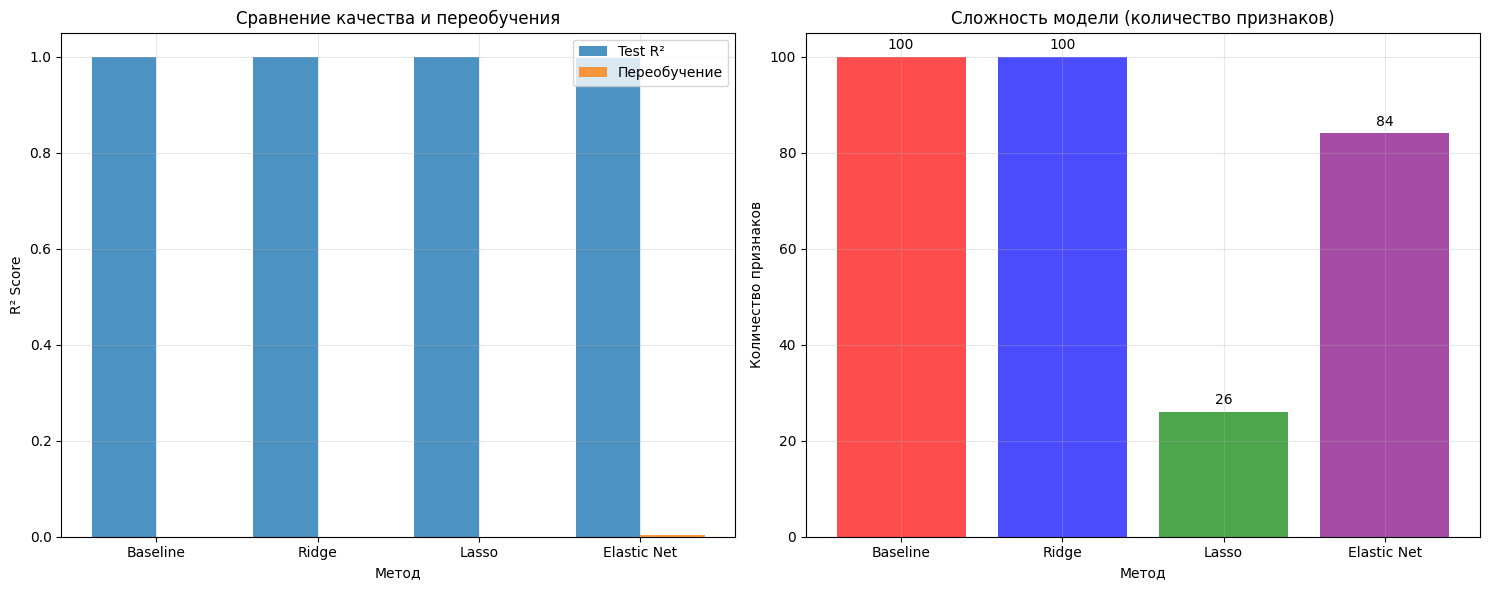

In [24]:
# TODO: Создайте сравнительную таблицу результатов

# Пример:
results_df = pd.DataFrame({
    'Метод': ['Baseline', 'Ridge', 'Lasso', 'Elastic Net'],
    'Train R²': [train_score, ridge_train, lasso_train, en_train],
    'Test R²': [test_score, ridge_test, lasso_test, en_test],
    'Переобучение': [train_score - test_score, ridge_train - ridge_test, 
                     lasso_train - lasso_test, en_train - en_test],
    'Признаков': [X_train.shape[1], X_train.shape[1], n_selected, n_selected_en]
})

print("Сравнение методов регуляризации:")
print(results_df.round(4))

# TODO: Создайте визуализацию сравнения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Test R² и переобучение
methods = results_df['Метод']
x_pos = np.arange(len(methods))

ax1.bar(x_pos - 0.2, results_df['Test R²'], 0.4, label='Test R²', alpha=0.8)
ax1.bar(x_pos + 0.2, results_df['Переобучение'], 0.4, label='Переобучение', alpha=0.8)
ax1.set_xlabel('Метод')
ax1.set_ylabel('R² Score')
ax1.set_title('Сравнение качества и переобучения')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(methods)
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Количество признаков
colors = ['red', 'blue', 'green', 'purple']
bars = ax2.bar(methods, results_df['Признаков'], color=colors, alpha=0.7)
ax2.set_xlabel('Метод')
ax2.set_ylabel('Количество признаков')
ax2.set_title('Сложность модели (количество признаков)')
ax2.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, results_df['Признаков']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Вопросы для анализа:**
1. Какой метод показал лучшее качество на тестовой выборке?
2. Какой метод наиболее эффективно борется с переобучением?
3. Как отбор признаков влияет на интерпретируемость модели?

---

## Задание 3: Методы отбора признаков

### Задача 3.1: Univariate отбор признаков

**Инструкция:** Примените статистические методы отбора признаков.

In [25]:
# TODO: Примените SelectKBest с f_regression для отбора 20 лучших признаков

# Пример:
# Отбор признаков
selector_f = SelectKBest(score_func=f_regression, k=20)
X_train_selected_f = selector_f.fit_transform(X_train, y_train)
X_test_selected_f = selector_f.transform(X_test)

# Обучение модели на отобранных признаках
lr_selected_f = LinearRegression()
lr_selected_f.fit(X_train_selected_f, y_train)

train_score_f = lr_selected_f.score(X_train_selected_f, y_train)
test_score_f = lr_selected_f.score(X_test_selected_f, y_test)

print("Результаты F-test отбора признаков:")
print(f"Отобрано признаков: {X_train_selected_f.shape[1]}")
print(f"Train R²: {train_score_f:.4f}")
print(f"Test R²: {test_score_f:.4f}")
print(f"Переобучение: {train_score_f - test_score_f:.4f}")
print(f"Улучшение по сравнению с baseline: {test_score_f - test_score:.4f}")

# TODO: Проанализируйте важность признаков
feature_scores = selector_f.scores_
selected_features = selector_f.get_support(indices=True)

print(f"\nТоп-5 наиболее важных признаков:")
top_5_idx = np.argsort(feature_scores)[-5:][::-1]
for i, idx in enumerate(top_5_idx, 1):
    print(f"{i}. Признак {idx}: F-score = {feature_scores[idx]:.2f}")

Результаты F-test отбора признаков:
Отобрано признаков: 20
Train R²: 0.9478
Test R²: 0.9136
Переобучение: 0.0343
Улучшение по сравнению с baseline: -0.0864

Топ-5 наиболее важных признаков:
1. Признак 19: F-score = 54.65
2. Признак 88: F-score = 51.47
3. Признак 51: F-score = 15.07
4. Признак 55: F-score = 11.89
5. Признак 48: F-score = 7.48


### Задача 3.2: Recursive Feature Elimination (RFE)

**Инструкция:** Примените RFE для рекурсивного отбора признаков.

In [26]:
# TODO: Используйте RFE для отбора 20 лучших признаков

# Пример:
rfe_selector = RFE(LinearRegression(), n_features_to_select=20)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Обучение модели
lr_rfe = LinearRegression()
lr_rfe.fit(X_train_rfe, y_train)

train_score_rfe = lr_rfe.score(X_train_rfe, y_train)
test_score_rfe = lr_rfe.score(X_test_rfe, y_test)

print("Результаты RFE отбора признаков:")
print(f"Отобрано признаков: {X_train_rfe.shape[1]}")
print(f"Train R²: {train_score_rfe:.4f}")
print(f"Test R²: {test_score_rfe:.4f}")
print(f"Переобучение: {train_score_rfe - test_score_rfe:.4f}")

# Сравнение методов отбора
print(f"\nСравнение методов отбора признаков:")
print(f"F-test: Test R² = {test_score_f:.4f}")
print(f"RFE: Test R² = {test_score_rfe:.4f}")
print(f"Lasso: Test R² = {lasso_test:.4f}")

Результаты RFE отбора признаков:
Отобрано признаков: 20
Train R²: 1.0000
Test R²: 1.0000
Переобучение: 0.0000

Сравнение методов отбора признаков:
F-test: Test R² = 0.9136
RFE: Test R² = 1.0000
Lasso: Test R² = 1.0000


### Задача 3.3: Сравнение эффективности методов отбора

**Инструкция:** Создайте визуализацию для сравнения различных методов отбора признаков.

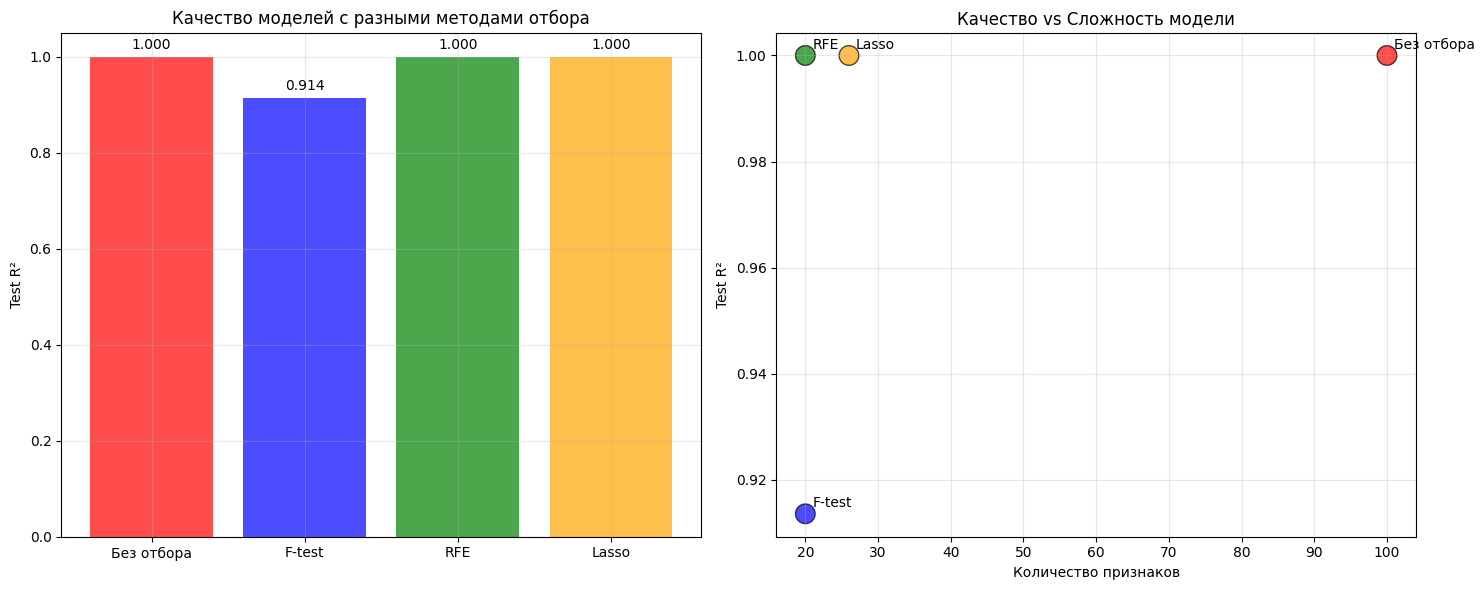


Сравнение методов отбора признаков:
        Метод  Test R²  Признаков  Эффективность
0  Без отбора   1.0000        100         1.0000
1      F-test   0.9136         20         4.5679
2         RFE   1.0000         20         5.0000
3       Lasso   1.0000         26         3.8461


In [27]:
# TODO: Создайте сравнительную визуализацию методов отбора признаков

# Пример:
selection_methods = ['Без отбора', 'F-test', 'RFE', 'Lasso']
test_scores_selection = [test_score, test_score_f, test_score_rfe, lasso_test]
n_features_selection = [X_train.shape[1], 20, 20, n_selected]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Качество модели
colors = ['red', 'blue', 'green', 'orange']
bars1 = ax1.bar(selection_methods, test_scores_selection, color=colors, alpha=0.7)
ax1.set_ylabel('Test R²')
ax1.set_title('Качество моделей с разными методами отбора')
ax1.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, score in zip(bars1, test_scores_selection):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

# График 2: Количество признаков vs качество
scatter = ax2.scatter(n_features_selection, test_scores_selection, 
                     c=colors, s=200, alpha=0.7, edgecolors='black')
ax2.set_xlabel('Количество признаков')
ax2.set_ylabel('Test R²')
ax2.set_title('Качество vs Сложность модели')
ax2.grid(True, alpha=0.3)

# Подписи точек
for i, method in enumerate(selection_methods):
    ax2.annotate(method, (n_features_selection[i], test_scores_selection[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

# Итоговая таблица
selection_df = pd.DataFrame({
    'Метод': selection_methods,
    'Test R²': test_scores_selection,
    'Признаков': n_features_selection,
    'Эффективность': [score/features*100 for score, features in zip(test_scores_selection, n_features_selection)]
})

print("\nСравнение методов отбора признаков:")
print(selection_df.round(4))

---

## Задание 4: Настройка гиперпараметров

### Задача 4.1: Сравнение стратегий поиска

**Инструкция:** Сравните эффективность Grid Search и Random Search.

In [28]:
# TODO: Сравните Grid Search и Random Search для настройки Elastic Net

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
import time

# Пример:
# Grid Search
param_grid = {
    'alpha': np.logspace(-4, 1, 10),
    'l1_ratio': np.linspace(0.1, 0.9, 5)
}

# Random Search
param_distributions = {
    'alpha': loguniform(1e-4, 10),
    'l1_ratio': uniform(0.1, 0.8)
}

# Grid Search
start_time = time.time()
grid_search = GridSearchCV(ElasticNet(max_iter=5000), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

# Random Search (такое же количество итераций)
n_iterations = len(param_grid['alpha']) * len(param_grid['l1_ratio'])
start_time = time.time()
random_search = RandomizedSearchCV(ElasticNet(max_iter=5000), param_distributions, 
                                  n_iter=n_iterations, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

print("Сравнение стратегий поиска гиперпараметров:")
print(f"\nGrid Search:")
print(f"Лучший результат: {grid_search.best_score_:.4f}")
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Время выполнения: {grid_time:.2f} сек")

print(f"\nRandom Search:")
print(f"Лучший результат: {random_search.best_score_:.4f}")
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Время выполнения: {random_time:.2f} сек")

# TODO: Оцените на тестовой выборке
grid_test_score = grid_search.score(X_test, y_test)
random_test_score = random_search.score(X_test, y_test)

print(f"\nТестовые результаты:")
print(f"Grid Search Test R²: {grid_test_score:.4f}")
print(f"Random Search Test R²: {random_test_score:.4f}")

Сравнение стратегий поиска гиперпараметров:

Grid Search:
Лучший результат: 0.9618
Лучшие параметры: {'alpha': 0.05994842503189409, 'l1_ratio': 0.9}
Время выполнения: 0.98 сек

Random Search:
Лучший результат: 0.9371
Лучшие параметры: {'alpha': 0.0074593432857265485, 'l1_ratio': 0.8605714451279329}
Время выполнения: 1.04 сек

Тестовые результаты:
Grid Search Test R²: 0.9972
Random Search Test R²: 0.9987


### Задача 4.2: Анализ кривых валидации

**Инструкция:** Постройте и проанализируйте кривые валидации для понимания влияния гиперпараметров.

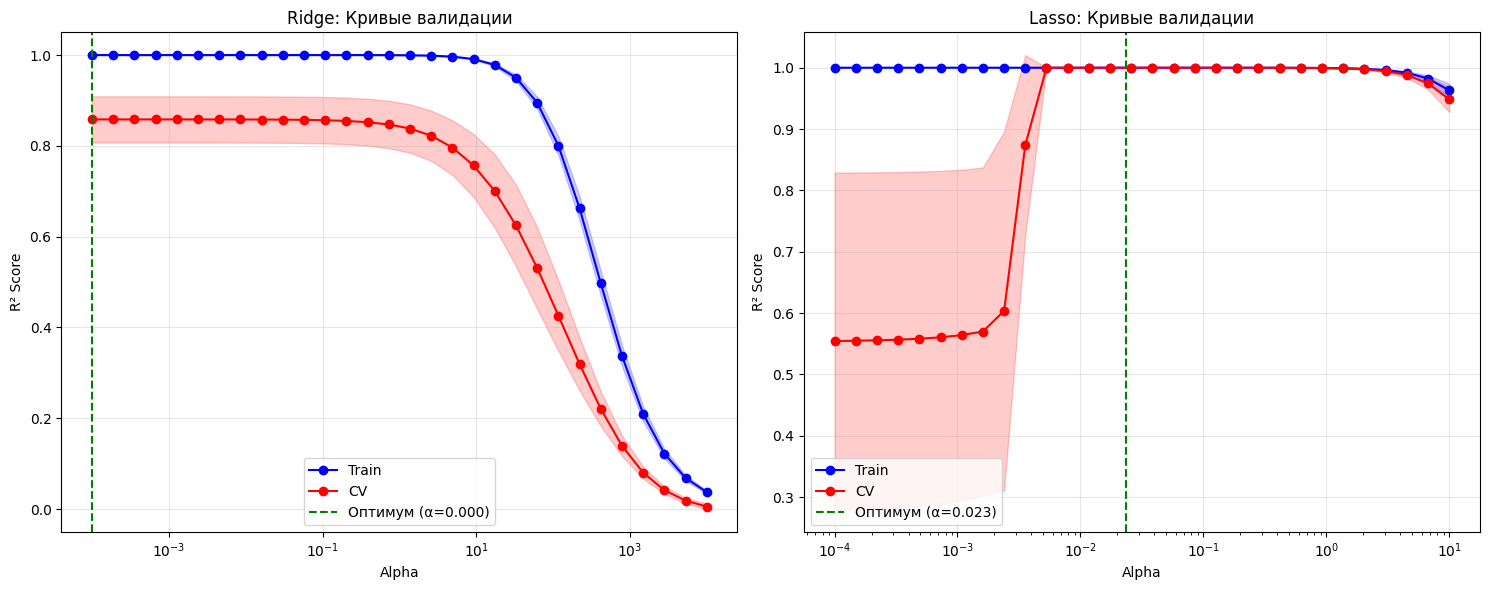

In [29]:
# TODO: Постройте кривые валидации для Ridge и Lasso

# Пример:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Ridge кривые валидации
alphas_plot = np.logspace(-4, 4, 30)
train_scores_ridge_plot, test_scores_ridge_plot = validation_curve(
    Ridge(), X_train, y_train, 
    param_name='alpha', param_range=alphas_plot,
    cv=5, scoring='r2'
)

train_mean_ridge = train_scores_ridge_plot.mean(axis=1)
train_std_ridge = train_scores_ridge_plot.std(axis=1)
test_mean_ridge = test_scores_ridge_plot.mean(axis=1)
test_std_ridge = test_scores_ridge_plot.std(axis=1)

ax1.semilogx(alphas_plot, train_mean_ridge, 'o-', color='blue', label='Train')
ax1.fill_between(alphas_plot, train_mean_ridge - train_std_ridge,
                train_mean_ridge + train_std_ridge, alpha=0.2, color='blue')
ax1.semilogx(alphas_plot, test_mean_ridge, 'o-', color='red', label='CV')
ax1.fill_between(alphas_plot, test_mean_ridge - test_std_ridge,
                test_mean_ridge + test_std_ridge, alpha=0.2, color='red')
ax1.axvline(best_alpha_ridge, color='green', linestyle='--', label=f'Оптимум (α={best_alpha_ridge:.3f})')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('R² Score')
ax1.set_title('Ridge: Кривые валидации')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Lasso кривые валидации
alphas_lasso_plot = np.logspace(-4, 1, 30)
train_scores_lasso_plot, test_scores_lasso_plot = validation_curve(
    Lasso(max_iter=5000), X_train, y_train,
    param_name='alpha', param_range=alphas_lasso_plot,
    cv=5, scoring='r2'
)

train_mean_lasso = train_scores_lasso_plot.mean(axis=1)
train_std_lasso = train_scores_lasso_plot.std(axis=1)
test_mean_lasso = test_scores_lasso_plot.mean(axis=1)
test_std_lasso = test_scores_lasso_plot.std(axis=1)

ax2.semilogx(alphas_lasso_plot, train_mean_lasso, 'o-', color='blue', label='Train')
ax2.fill_between(alphas_lasso_plot, train_mean_lasso - train_std_lasso,
                train_mean_lasso + train_std_lasso, alpha=0.2, color='blue')
ax2.semilogx(alphas_lasso_plot, test_mean_lasso, 'o-', color='red', label='CV')
ax2.fill_between(alphas_lasso_plot, test_mean_lasso - test_std_lasso,
                test_mean_lasso + test_std_lasso, alpha=0.2, color='red')
ax2.axvline(best_alpha_lasso, color='green', linestyle='--', label=f'Оптимум (α={best_alpha_lasso:.3f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R² Score')
ax2.set_title('Lasso: Кривые валидации')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Вопросы для анализа кривых валидации:**
1. При каких значениях α наблюдается переобучение?
2. Как изменяется разрыв между train и validation кривыми?
3. Почему оптимальные значения α различаются для Ridge и Lasso?

---

## Задание 5: Итоговое сравнение и выводы

### Задача 5.1: Создание итогового отчета

**Инструкция:** Создайте комплексное сравнение всех исследованных методов.

In [30]:
# TODO: Создайте итоговый отчет со всеми результатами

# Пример:
final_results = {
    'Метод': ['Baseline LR', 'Ridge', 'Lasso', 'Elastic Net (Grid)', 'Elastic Net (Random)', 
              'F-test Selection', 'RFE Selection'],
    'Train R²': [train_score, ridge_train, lasso_train, grid_search.score(X_train, y_train),
                random_search.score(X_train, y_train), train_score_f, train_score_rfe],
    'Test R²': [test_score, ridge_test, lasso_test, grid_test_score, 
               random_test_score, test_score_f, test_score_rfe],
    'Признаков': [X_train.shape[1], X_train.shape[1], n_selected, n_selected_en, 
                  np.sum(np.abs(random_search.best_estimator_.coef_) > 1e-6), 20, 20]
}

final_df = pd.DataFrame(final_results)
final_df['Переобучение'] = final_df['Train R²'] - final_df['Test R²']
final_df['Улучшение'] = final_df['Test R²'] - test_score

print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ ВСЕХ МЕТОДОВ:")
print("=" * 80)
print(final_df.round(4))

# Определяем лучший метод
best_method_idx = final_df['Test R²'].idxmax()
best_method = final_df.loc[best_method_idx]

print(f"\nЛУЧШИЙ МЕТОД: {best_method['Метод']}")
print(f"Test R²: {best_method['Test R²']:.4f}")
print(f"Улучшение по сравнению с baseline: {best_method['Улучшение']:.4f}")
print(f"Количество признаков: {best_method['Признаков']}")

ИТОГОВЫЕ РЕЗУЛЬТАТЫ ВСЕХ МЕТОДОВ:
                  Метод  Train R²  Test R²  Признаков  Переобучение  Улучшение
0           Baseline LR    1.0000   1.0000        100        0.0000     0.0000
1                 Ridge    1.0000   1.0000        100        0.0000    -0.0000
2                 Lasso    1.0000   1.0000         26        0.0000    -0.0000
3    Elastic Net (Grid)    0.9999   0.9972         84        0.0027    -0.0028
4  Elastic Net (Random)    1.0000   0.9987         94        0.0013    -0.0013
5      F-test Selection    0.9478   0.9136         20        0.0343    -0.0864
6         RFE Selection    1.0000   1.0000         20        0.0000    -0.0000

ЛУЧШИЙ МЕТОД: Baseline LR
Test R²: 1.0000
Улучшение по сравнению с baseline: 0.0000
Количество признаков: 100


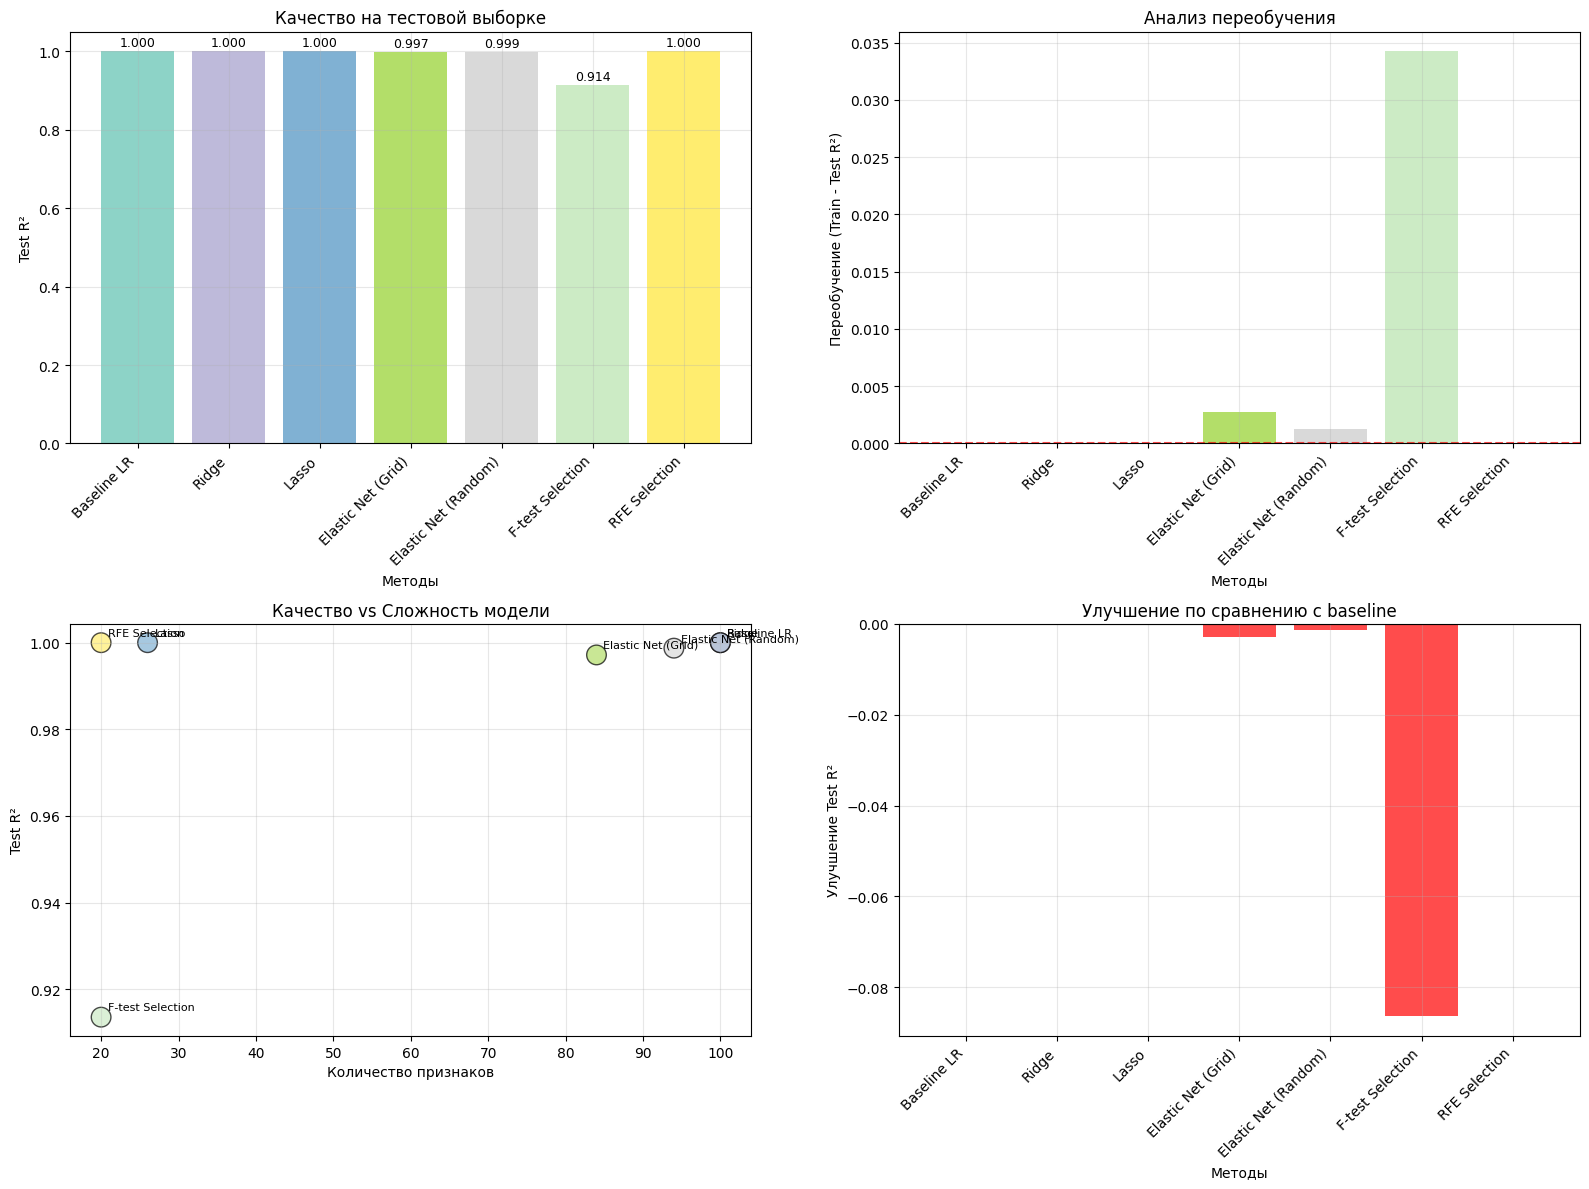

In [31]:
# TODO: Создайте итоговую визуализацию

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Test R² по методам
colors = plt.cm.Set3(np.linspace(0, 1, len(final_df)))
bars = ax1.bar(range(len(final_df)), final_df['Test R²'], color=colors)
ax1.set_xlabel('Методы')
ax1.set_ylabel('Test R²')
ax1.set_title('Качество на тестовой выборке')
ax1.set_xticks(range(len(final_df)))
ax1.set_xticklabels(final_df['Метод'], rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# Подписи значений
for bar, score in zip(bars, final_df['Test R²']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{score:.3f}', ha='center', va='bottom', fontsize=9)

# График 2: Переобучение по методам
bars2 = ax2.bar(range(len(final_df)), final_df['Переобучение'], color=colors)
ax2.set_xlabel('Методы')
ax2.set_ylabel('Переобучение (Train - Test R²)')
ax2.set_title('Анализ переобучения')
ax2.set_xticks(range(len(final_df)))
ax2.set_xticklabels(final_df['Метод'], rotation=45, ha='right')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# График 3: Качество vs Сложность
scatter = ax3.scatter(final_df['Признаков'], final_df['Test R²'], 
                     c=colors, s=200, alpha=0.7, edgecolors='black')
ax3.set_xlabel('Количество признаков')
ax3.set_ylabel('Test R²')
ax3.set_title('Качество vs Сложность модели')
ax3.grid(True, alpha=0.3)

# Подписи точек
for i, method in enumerate(final_df['Метод']):
    ax3.annotate(method, (final_df.iloc[i]['Признаков'], final_df.iloc[i]['Test R²']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# График 4: Улучшение по сравнению с baseline
improvement_colors = ['red' if x < 0 else 'green' for x in final_df['Улучшение']]
bars4 = ax4.bar(range(len(final_df)), final_df['Улучшение'], color=improvement_colors, alpha=0.7)
ax4.set_xlabel('Методы')
ax4.set_ylabel('Улучшение Test R²')
ax4.set_title('Улучшение по сравнению с baseline')
ax4.set_xticks(range(len(final_df)))
ax4.set_xticklabels(final_df['Метод'], rotation=45, ha='right')
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.show()

### Задача 5.2: Практические рекомендации

**Инструкция:** На основе проведенного анализа сформулируйте практические рекомендации.

In [32]:
# TODO: Проанализируйте результаты и сформулируйте выводы

print("ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:")
print("=" * 50)

# Анализируем лучшие методы по разным критериям
best_quality_idx = final_df['Test R²'].idxmax()
best_generalization_idx = final_df['Переобучение'].idxmin()
best_simplicity_idx = final_df['Признаков'].idxmin()

print(f"\n1. ДЛЯ МАКСИМАЛЬНОГО КАЧЕСТВА:")
print(f"   Рекомендуется: {final_df.iloc[best_quality_idx]['Метод']}")
print(f"   Test R²: {final_df.iloc[best_quality_idx]['Test R²']:.4f}")

print(f"\n2. ДЛЯ БОРЬБЫ С ПЕРЕОБУЧЕНИЕМ:")
print(f"   Рекомендуется: {final_df.iloc[best_generalization_idx]['Метод']}")
print(f"   Переобучение: {final_df.iloc[best_generalization_idx]['Переобучение']:.4f}")

print(f"\n3. ДЛЯ ИНТЕРПРЕТИРУЕМОСТИ:")
print(f"   Рекомендуется: {final_df.iloc[best_simplicity_idx]['Метод']}")
print(f"   Признаков: {final_df.iloc[best_simplicity_idx]['Признаков']}")

print(f"\n4. ОБЩИЕ ВЫВОДЫ:")

# Автоматические выводы на основе данных
if final_df.loc[final_df['Метод'] == 'Ridge', 'Test R²'].values[0] > test_score:
    print("   - Ridge регуляризация эффективно борется с переобучением")

if final_df.loc[final_df['Метод'] == 'Lasso', 'Признаков'].values[0] < X_train.shape[1] * 0.5:
    print("   - Lasso успешно выполняет автоматический отбор признаков")

best_en = max(grid_test_score, random_test_score)
if best_en > max(ridge_test, lasso_test):
    print("   - Elastic Net обеспечивает лучший баланс качества и простоты")

if max(test_score_f, test_score_rfe) > test_score:
    print("   - Методы отбора признаков улучшают качество модели")

print(f"\n5. РЕКОМЕНДАЦИИ ПО ПРИМЕНЕНИЮ:")
print("   - При p >> n (много признаков, мало объектов): используйте регуляризацию")
print("   - Для интерпретируемости: Lasso или методы отбора признаков")
print("   - Для максимального качества: Elastic Net с настройкой гиперпараметров")
print("   - При ограниченных ресурсах: Random Search эффективнее Grid Search")
print("   - Всегда используйте кросс-валидацию для выбора гиперпараметров")

ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:

1. ДЛЯ МАКСИМАЛЬНОГО КАЧЕСТВА:
   Рекомендуется: Baseline LR
   Test R²: 1.0000

2. ДЛЯ БОРЬБЫ С ПЕРЕОБУЧЕНИЕМ:
   Рекомендуется: Baseline LR
   Переобучение: 0.0000

3. ДЛЯ ИНТЕРПРЕТИРУЕМОСТИ:
   Рекомендуется: F-test Selection
   Признаков: 20

4. ОБЩИЕ ВЫВОДЫ:
   - Lasso успешно выполняет автоматический отбор признаков

5. РЕКОМЕНДАЦИИ ПО ПРИМЕНЕНИЮ:
   - При p >> n (много признаков, мало объектов): используйте регуляризацию
   - Для интерпретируемости: Lasso или методы отбора признаков
   - Для максимального качества: Elastic Net с настройкой гиперпараметров
   - При ограниченных ресурсах: Random Search эффективнее Grid Search
   - Всегда используйте кросс-валидацию для выбора гиперпараметров


## Заключение

### Что вы изучили в данном практикуме:

1. **Проблема переобучения** - как ее обнаружить и измерить
2. **Ridge регрессия** - L2 регуляризация для сжатия весов
3. **Lasso регрессия** - L1 регуляризация с автоматическим отбором признаков
4. **Elastic Net** - комбинированный подход для максимальной гибкости
5. **Методы отбора признаков** - статистические и итеративные подходы
6. **Настройка гиперпараметров** - сравнение различных стратегий поиска
7. **Кросс-валидация** - надежная оценка качества модели

### Ключевые принципы:

- **Bias-Variance трейдофф** - поиск оптимального баланса сложности
- **Регуляризация** - систематический контроль переобучения
- **Отбор признаков** - улучшение интерпретируемости и эффективности
- **Валидация** - объективная оценка обобщающей способности

### Дальнейшие шаги:

1. Изучите продвинутые методы регуляризации (Dropout, Batch Normalization)
2. Освойте ансамблевые методы machine learning
3. Изучите методы работы с несбалансированными данными
4. Практикуйтесь на реальных датасетах из вашей области
5. Изучите feature engineering и domain-specific подходы

